In [5]:
from mcm import EcModel
reference= 'eclogitization_breakwater_monzodiorite'

In [6]:
phases = [
    'Clinopyroxene',
    'Orthopyroxene',
    'Quartz',
    'Feldspar', 
    'Garnet', 
    'Kyanite',
]

ems = [
    'Diopside', 'Hedenbergite', 'Clinoenstatite', 'CaTschermaks', 'Jadeite',
    'Enstatite', 'Ferrosilite', 'MgTschermaks', 'OrthoDiopside',
    'Quartz',
    'Anorthite','Albite',
    'Pyrope', 'Almandine', 'Grossular', 'MgMajorite', 'NaMajorite',
    'Kyanite'
]

# mass fractions of the phases
## Grt-Opx-Cpx granulite
## given as volume fractions
phii0 = [
    0.16, # cpx
    0.14, # opx
    0.0, # quartz
    0.57+0.05, # plag + k-spar
    0.0, # garnet
    0.08, # kyanite
 ]

xCpx =  0.229 # Fe/(Fe+Mg)
jCpx =  0.179 # Na/(Ca+Na)
xGrt =  0.588 # Fe/(Fe+Mg)
zGrt =  0.157 # Ca/(Ca+Mg+Fe[2+])
xOpx =  0.364 # Fe/(Fe+Mg)
yOpx =  0.090 # Si+Al-2 ??
NaKfs = 0.248 # Na/(Na+Ca+K)
CaKfs = 0.020 # Ca/(Ca+Na+K)
CaPl =  0.391 # Ca/(Ca+Na+K)
KPl =   0.052 # K/(K+Ca+Na)


# assume all feldspar is plag,
# assume plag is binary soln
# convert from ternary feldspar to binary

NaPl = 1 - CaPl - KPl # Na in plag with K
NaPl = NaPl/(NaPl+CaPl) # renormalize Na without K
CaPl = 1 - NaPl # renormalize Ca without K, Na + Ca = 1

Xik0 = [
    #CaMg           CaFe                       NaAl
    [(1-jCpx)*xCpx, (1-jCpx)*(1-xCpx), 0., 0., jCpx], # di, hed, *cEn, *cats, jd

    #Mg      Fe
    [1-xOpx, xOpx, 0., 0.], # en, fs, *mgts, *oDi

    [1.], # quartz

    #Ca,   Na
    [CaPl, NaPl], # an, ab
    
    #Mg3,               Fe3,           Ca3
    [(1-zGrt)*(1-xGrt), (1-zGrt)*xGrt, zGrt, 0., 0.], # py, alm, gr, *mgmaj, *namaj

    [1.], # kyanite
]


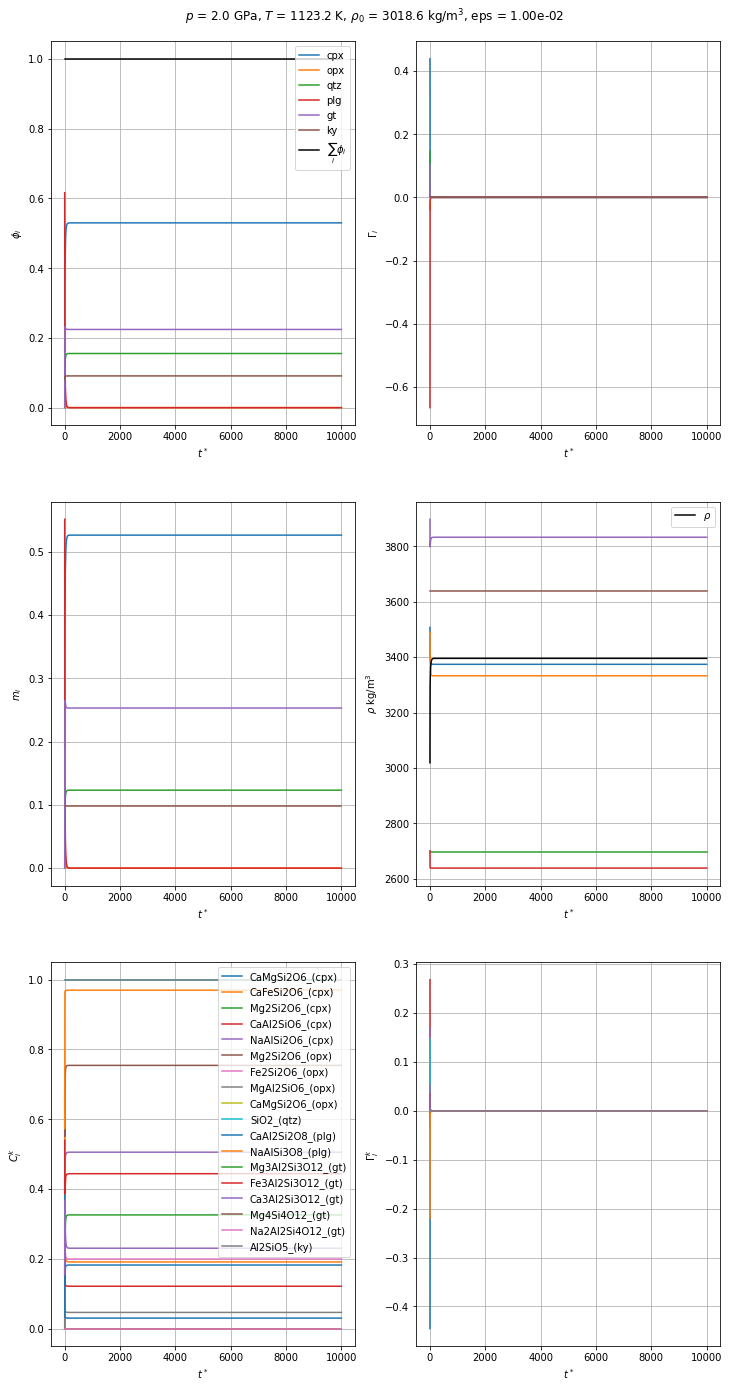

,Clinopyroxene_slb_ph,Orthopyroxene_slb_ph,Quartz_slb_ph,Feldspar_slb_ph,Garnet_slb_ph,Kyanite_slb_ph
Mode (initial),0.188012,1.631077e-01,0.000000,5.514036e-01,0.000000,0.097477
Mode (final),0.526342,-2.977001e-13,0.123195,-7.404727e-14,0.252986,0.097477


KeyboardInterrupt: 

In [7]:
model = EcModel(
    reference,
    "eclogitization_agu3_slb_rx",
    phii0=phii0,
    Xik0=Xik0,
    P0=1.95,
    T0=850.+273.15
)

model.run(reload=False,save=True,end_t=1e4)

Reaction object: eclogitization_agu2_slb_rx

Phase 0 Clinopyroxene_slb_ph (cpx)
     Endmember 0 Diopside_slb_em : CaMgSi2O6_(cpx)
     Endmember 1 Hedenbergite_slb_em : CaFeSi2O6_(cpx)
     Endmember 2 Clinoenstatite_slb_em : Mg2Si2O6_(cpx)
     Endmember 3 CaTschermaks_slb_em : CaAl2SiO6_(cpx)
     Endmember 4 Jadeite_slb_em : NaAlSi2O6_(cpx)
Phase 1 Orthopyroxene_slb_ph (opx)
     Endmember 0 Enstatite_slb_em : Mg2Si2O6_(opx)
     Endmember 1 Ferrosilite_slb_em : Fe2Si2O6_(opx)
     Endmember 2 MgTschermaks_slb_em : MgAl2SiO6_(opx)
     Endmember 3 OrthoDiopside_slb_em : CaMgSi2O6_(opx)
Phase 2 Quartz_slb_ph (qtz)
     Endmember 0 Quartz_slb_em : SiO2_(qtz)
Phase 3 Feldspar_slb_ph (plg)
     Endmember 0 Anorthite_slb_em : CaAl2Si2O8_(plg)
     Endmember 1 Albite_slb_em : NaAlSi3O8_(plg)
Phase 4 Garnet_slb_ph (gt)
     Endmember 0 Pyrope_slb_em : Mg3Al2Si3O12_(gt)
     Endmember 1 Almandine_slb_em : Fe3Al2Si3O12_(gt)
     Endmember 2 Grossular_slb_em : Ca3Al2Si3O12_(gt)
     Endmembe